# **Project 3**
### **The Problem**
Most if not all nations take the defense of their country as well as its citizens and interests incredibly seriously (or if they don't the should probably start). One of the things that might needed to be taken into consideration is the capabilities of possible competitors or even allies. Obviously, the defensive budget of a country is a large determinant of how many military personnel a country can field, the number and quality of their vehicles/equipment and how productive their research and development is. While this number is normally available, some countries may be reluctant to allow everyone else to know what exactly it is they have "up their sleeve", thus potentially leading them to not be entirely truthful about how much exactly they are spending on their defensive industry. I believe that using linear modeling, some of the factors we are able to know, such as general economic factors, population factors, and existing equipment, may be able to lend a hand in determining the true amount that countries are spending on their defense.

In [2]:
#Importing all the things we'll need
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import math

### **The Data**
The data I have chosen is a dataset from Kaggle that focuses on the many factors of a country that goes into determining its "military might". While this idea is conceptual to a degree, the dataset offers a large amount of other metrics, such as number of individual vehicle types like tanks or planes, economic factors like national debt or purchasing power, and population factors such as number of people in the military or the workforce.
Link:
https://www.kaggle.com/datasets/prasertk/military-power-by-country-2022/

### **Regression and How it Works**
Regression is a somewhat simple concept in theory. A formula is applied and placed over data in order to predict new observations. Specifically, linear regression attempts to determine the slope of a line. This is done by giving coefficients to each variable that almost act as "weights", so dependent on the value of a variable, the output of the target variable can be predicted after variables are multiplied by the coefficients. During linear regression, the final line that is chosen is the line that has the least amount of total error, or the distance that the line is from each existing observation or point. 

### **Pre-Proccessing**
This data is incredibly clean and has no NA values, so that does not need to be addressed. But what I did decide to do was in order to measure some of my variables, I needed to do some feature engineering and create new features based on what I already had.

Below I am brining in the dataset, creating those new features and checking for NaN values.

In [3]:
#Bringing in the data and taking a quick look at some of our features 
df = pd.read_csv('global firepower 2022 wide.csv')
#Doing some feature engineering to get total number of land based vehicles and total military personnel (including private military) 
df['Land Vehicles'] = df['Armored Vehicles']+df['Tanks']+ df['Towed Artillery']+ df['Self-Propelled Artillery']+df['Rocket Projectors']
df['Total Military'] = df['Active Personnel']+df['Reserve Personnel']+df['Paramilitary']
print(df.columns)
print(df.isna().sum())

Index(['country', 'country_code', 'Active Personnel', 'Aircraft Carriers',
       'Armored Vehicles', 'Attack Helicopters', 'Available Manpower',
       'Coastline Coverage', 'Corvettes', 'Dedicated Attack', 'Defense Budget',
       'Destroyers', 'External Debt', 'Fighters/Interceptors',
       'Fit-for-Service', 'Foreign Exchange/Gold', 'Frigates',
       'Helicopter Carriers', 'Helicopters', 'Labor Force',
       'Merchant Marine Fleet', 'Mine Warfare', 'Navy Ships',
       'Oil Consumption', 'Oil Production', 'Oil Proven Reserves',
       'Paramilitary', 'Patrol Vessels', 'Ports / Trade Terminals',
       'Purchasing Power Parity', 'Railway Coverage',
       'Reaching Mil Age Annually', 'Reserve Personnel', 'Roadway Coverage',
       'Rocket Projectors', 'Self-Propelled Artillery', 'Shared Borders',
       'Special-Mission', 'Square Land Area', 'Submarines', 'Tanker Fleet',
       'Tanks', 'Total Aircraft Strength', 'Total Population',
       'Towed Artillery', 'Trainers', 'Transpor

### **Visualizations**
The most helpful visualization to help understand the relationship between our target and predictors is probably a correlation matrix, so below is a correlation heat map to help confirm whether or not our predictors and target are related, and the nature of that relation.

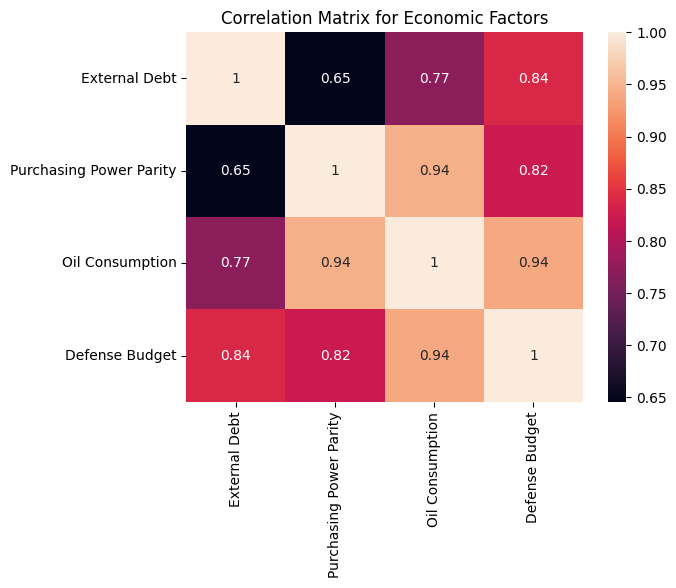

In [4]:
#equipment: land vics (armored vics+tanks+towed arty+self prop arty+rocket), air (total aircraft), boats(navy ships)
#population: (active+reserve), labor force, population
#econ: debt, purchasing power, oil consumption
#Creating DataFrame for our economic factors (population too, may be used at a later date)
pop_df = df[['Total Military', 'Labor Force', 'Total Population','Defense Budget']]
econ_df = df[['External Debt', 'Purchasing Power Parity', 'Oil Consumption','Defense Budget']]
#Making a correlation heatmap for our economic factors to see how well they correlate to defense budget
econ_plot = sns.heatmap(econ_df.corr(),annot=True)
plt.title('Correlation Matrix for Economic Factors')
plt.show()

To start off with the first experiment, I decided to follow along the route of economic factors and see if they could help in the predictions of defensive budget. Debt and Purchase Power Parity(to USD) seem like related economic factors, but I also chose oil consumption as another predictor that fits along with economic pattern, as it can be assumed countries with higher oil consumption are likely to be more well to do economically. As you can see from the heatmap above, the factors chosen all correlate rather strongly with a countries defensive budget, so it would seem that we may be able to generate a good model from these features.

### **First Experiment/Model**
I have already explained above as to why I have chosen these factors, so now we can begin to create our first model below. I begin with separating the features from the predictors and creating a training and testing split for each. Once the linear model is fitted, we can begin use it to predict values from our testing set.

In [5]:
#Separating our target value from the other features
econ_target = econ_df['Defense Budget']
new_econ_df = econ_df.drop(labels= 'Defense Budget',axis = 1)

In [6]:
econ_train,econ_test = train_test_split(new_econ_df, test_size=.15,random_state=1)
target_train,target_test = train_test_split(econ_target, test_size=.15,random_state=1)

In [7]:
econ_lm = linear_model.LinearRegression()
econ_lm.fit(econ_train,target_train)

LinearRegression()

In [8]:
econ_pred =  econ_lm.predict(econ_test)

Now to look at some of our metrics of measurement.

In [9]:
econ_coefs = econ_lm.coef_
econ_cols = new_econ_df.columns
for num in range(len(econ_coefs)):
    print('Coefficient for ',econ_cols[num],': ',econ_coefs[num])
print('Coefficient of determination (R Squared): %.2f' % r2_score(target_test, econ_pred))
print('Root mean squared error: %.2f' % math.sqrt(mean_squared_error(target_test, econ_pred)))

Coefficient for  External Debt :  0.007918518938355747
Coefficient for  Purchasing Power Parity :  -0.010454506219399409
Coefficient for  Oil Consumption :  38287.25766421527
Coefficient of determination (R Squared): 0.58
Root mean squared error: 21752729314.85


So above we have our coefficients, our R Squared and our RMSE. The R squared can be considered acceptable. But wow... that RMSE looks pretty crazy, but lets take some time to think about it. This RMSE is being represented in USD, so we have a mean squared error of about 2 billion dollars. Again, this sounds like a lot, but in the grand scheme of national defensive budgets, 2 billion isn't anything crazy.

### **Second Experiment/Model**
For this second model, I'm still very interested in the economic factors mostly because of the high correlation between the predictors and the target. So this go around, I will try and standardize the data and see if that has any noticeable effect on the model and can give us any better of an idea of what we're looking at. 

In [10]:
#Standardizing all the values from our original dataframe
econ_std = econ_df.values
econ_std = StandardScaler().fit_transform(econ_std)
#Once again, separating our target from our other features
econ_std = pd.DataFrame(econ_std)
econ_target_std = econ_std[3]
econ_std = econ_std.drop(labels=3, axis=1)

In [11]:
econ_train_std,econ_test_std = train_test_split(econ_std, test_size=.15,random_state=1)
target_train_std,target_test_std = train_test_split(econ_target_std, test_size=.15,random_state=1)

In [12]:
econstd_lm = linear_model.LinearRegression()
econstd_lm.fit(econ_train_std,target_train_std)
econstd_pred =  econstd_lm.predict(econ_test_std)

In [13]:
econstd_coefs = econstd_lm.coef_
econ_cols = new_econ_df.columns
for num in range(len(econstd_coefs)):
    print('Coefficient for ',econ_cols[num],': ',econstd_coefs[num])
print('Coefficient of determination (R Squared): %.2f' % r2_score(target_test_std, econstd_pred))
print('Root mean squared error: %.2f' % math.sqrt(mean_squared_error(target_test_std, econstd_pred)))

Coefficient for  External Debt :  0.23586381457548425
Coefficient for  Purchasing Power Parity :  -0.4089373124058218
Coefficient for  Oil Consumption :  1.1510639880854556
Coefficient of determination (R Squared): 0.58
Root mean squared error: 0.31


This time things seem to be much better, we've got the same R Squared value, but our RMSE is something that means a bit more sense when trying to think about it generally. So now we know this model has a RMSE of about one third of a standard deviation.

### **Third Experiment/Model**
For this third model, I'm going to explore how the number of vehicles/equipment a country maintains factor in to how much they spend on their budget. For the predictors I've chosen the total number of Land vehicles (sum of tanks, armored vehicles, artillery, mobile rocket systems, etc.), planes, and naval ships a country has. Remember that should these predictors remain unstandardized we'll get another RMSE represented in dollars, which is nice to know, but not entirely useful for us, so I will be standardizing the data again.

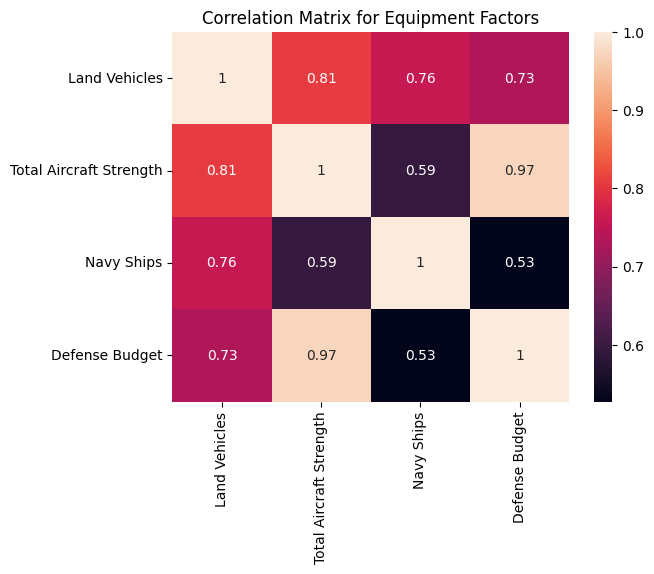

In [14]:
equip_df = df[['Land Vehicles','Total Aircraft Strength', 'Navy Ships', 'Defense Budget']]
#Making a correlation heatmap for our equipment factors to see how well they correlate to defense budget
equip_plot = sns.heatmap(equip_df.corr(),annot=True)
plt.title('Correlation Matrix for Equipment Factors')
plt.show()

Just to make sure I wasn't wasting my time, I made another correlation heatmap to ensure that there was correlation between my predictors and target.

In [15]:
#Standardizing all the values from our original dataframe
equip_std = equip_df.values
equip_std = StandardScaler().fit_transform(equip_std)
equip_std = pd.DataFrame(equip_std)
equip_target_std = equip_std[3]
equip_std = equip_std.drop(labels=3, axis=1)

In [16]:
equip_train,equip_test = train_test_split(equip_std, test_size=.15,random_state=1)
equiptgt_train,equiptgt_test = train_test_split(equip_target_std, test_size=.15,random_state=1)

In [17]:
equip_lm = linear_model.LinearRegression()
equip_lm.fit(equip_train,equiptgt_train)
equip_pred =  equip_lm.predict(equip_test)

In [18]:
equip_coefs = equip_lm.coef_
equip_cols = equip_df.columns
for num in range(len(equip_coefs)):
    print('Coefficient for ',equip_cols[num],': ',equip_coefs[num])
print('Coefficient of determination (R Squared): %.2f' % r2_score(equiptgt_test, equip_pred))
print('Root mean squared error: %.2f' % math.sqrt(mean_squared_error(equiptgt_test, equip_pred)))
#plt.scatter(equip_test[2], equiptgt_test,  color='black')
#plt.plot(equip_test[2], equip_pred, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficient for  Land Vehicles :  -0.0547069099803638
Coefficient for  Total Aircraft Strength :  1.053856170732822
Coefficient for  Navy Ships :  -0.018811593641745228
Coefficient of determination (R Squared): 0.72
Root mean squared error: 0.26


From the metrics above, this is another rather promising model, we have another good R squared value and an acceptable RMSE. So we can feel comfortable trusting the predictions that we will gain from this model.

#### **Just playing around**
Here I decided to make one final model with all 6 predictors I've used from the previous 3 models to get a sense how they relate to one another. Once again I've standardized the data so that we can get a bit more comprehensive measurements.

In [20]:
#Try and make one more model with all features
econ_equip_df = econ_df.merge(equip_df)
econ_equip_df.head()
eceq_std = econ_equip_df.values
eceq_std = StandardScaler().fit_transform(eceq_std)
eceq_std = pd.DataFrame(eceq_std)
eceq_tgt = eceq_std[3]
eceq_std = eceq_std.drop(labels=3,axis=1)
econ_equip_df = econ_equip_df.drop(labels="Defense Budget",axis = 1)

In [22]:
eceq_tr,eceq_tst = train_test_split(eceq_std,test_size=.15,random_state=1)
eceqtgt_tr,eceqtgt_tst = train_test_split(eceq_tgt,test_size=.15,random_state=1)
eceq_lm = linear_model.LinearRegression()
eceq_lm.fit(eceq_tr,eceqtgt_tr)
eceq_pred = eceq_lm.predict(eceq_tst)

In [23]:
eceq_coefs = eceq_lm.coef_
eceq_cols = econ_equip_df.columns
for num in range(len(eceq_coefs)):
    print('Coefficient for ',eceq_cols[num],': ',eceq_coefs[num])
print('Coefficient of determination (R Squared): %.2f' % r2_score(eceqtgt_tst, eceq_pred))
print('Root mean squared error: %.2f' % math.sqrt(mean_squared_error(eceqtgt_tst, eceq_pred)))

Coefficient for  External Debt :  0.09223020608492792
Coefficient for  Purchasing Power Parity :  0.11093947694629658
Coefficient for  Oil Consumption :  0.2570484046642827
Coefficient for  Land Vehicles :  -0.16009586261890077
Coefficient for  Total Aircraft Strength :  0.7411876999654787
Coefficient for  Navy Ships :  -0.07201600035442413
Coefficient of determination (R Squared): 0.78
Root mean squared error: 0.23


 For this model we can see that aircraft still hold a lot of weight in determining defensive budget, which is addressed in my conclusion. But we can also see in this model that while oil consumption still holds the second most weight, it is not nearly as "strong" as number of aircraft. This model is also better than all previous ones in that the RMSE is only about a quarter of a standard deviation.


### **Conclusion**
So from the three models created, the second two suggest that the predictors of interest do indeed not only have a strong relationship with a countries defensive budget, but that we may even be able to predict the rough defensive budget of a country should we know some of these predictors. Some things that I did notice was the weights given to oil consumption and number of aircraft, and that they held nearly all the weight in the coefficents. This is an understandable outcome when it comes to aircraft, because in the last 60-80 years, an emphasis has been placed on aircraft and their development while vehicles and ships have become rather common and attainable for most all countries. I am also unable to come up with a solid reason as to why oil consumption hold such a high weight in the predictions.

 I also would like to address the fact that global superpowers like the US, China and Russia can skew these experiments drastically, thus adding to the need for standardization. Another issue, while maybe not as big of a problem, is the issue of quality. For example, during the war in Ukraine, Russia boasted about its vast amount of tanks and other armored vehicles, only come to find out, a huge number of these vehicles were old models from as far back as the 80s. Situations like this can likely offset results, as just because a nation has a large number of something, does not take into account the quality. Again this may be another reason why vehicles were weighted so little in the third model.

 I found this data set very easy to work with, but I would say that something that would be incredibly helpful would be more data. While there are only so many countries in the world, yearly data from even the early 2000s would help the model significantly.

 ### **Impact**
It must be realized that this could have incredibly serious impacts. While these models could prove useful for countries that are level headed and wish only to protect their own nation, it could spell disaster should someone decide they want to pick out weaker countries that could be easy targets. Still, the models on their own do not determine if another country is a possible threat or target, but it needs to be understood that in the wrong hands, nearly any tool can be used for evil.


### **References**
Kaggle dataset:

https://www.kaggle.com/datasets/prasertk/military-power-by-country-2022/


Original source and documentation:


https://www.globalfirepower.com/countries-listing.php